In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df_cancer = load_breast_cancer()

Ya vimos algunas características generales, pero ahora veamos cuáles de estas son las variables objetivo que se pueden usar para el algorítmo de *KNN*:

In [12]:
df_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Creemos el conjunto de entrenamiento y de prueba para los algorítmos

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df_cancer.data,
                                                    df_cancer.target,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

Como ya conocemos la cantidad de *accuracy scores* que debemos hallar, podemos crear dos *array* de tamañao fijo que alamacene dichos valores. En este caso, serán de tamaño $10\times 2$ debido a que son 10 *scores* los que necesitamos y dos comparaciones.

In [5]:
accuracy_scores_train = np.ones((10))
accuracy_scores_test = np.ones((10))

In [6]:
for i in range(10):
    knn = KNeighborsClassifier(n_neighbors = i + 1,
                               metric = 'minkowski',
                               weights = 'uniform')
    
    knn.fit(X_train, Y_train)
    
    accuracy_scores_train[i] = knn.score(X_train, Y_train)
    accuracy_scores_test[i] = knn.score(X_test, Y_test)
    
    # También se puede hacer con el módulo "metrics" de sklearn y usar el siguiente código:
    # print("Accuracy:", metrics.accuracy_score(Y_test, calculated_labels))

<ol type="I"> 
    <li>Almacena a estos valores en dos listas diferentes y haz es un mismo plot las gráficas de los valores de k -en el eje horizontal- contra las listas con los accuracy scores (training  y  testing) correspondientes. No se te olvide poner las etiquetas en los ejes y una leyenda para distinguir a  cada tipo de score.
</ol>
Veamos los <em>accuracy scores</em> donde se empieza desde $k=1$.

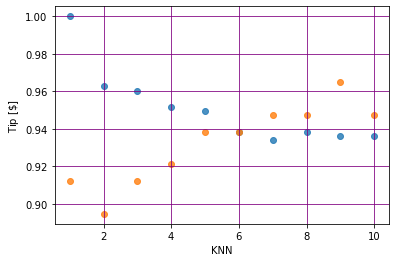

In [9]:
sns.regplot(x = np.arange(1,11), y = accuracy_scores_train, fit_reg = False)
sns.regplot(x = np.arange(1,11), y = accuracy_scores_test, fit_reg = False)
plt.xlabel("KNN")
plt.ylabel("Tip [$\$$]")
plt.xticks()
plt.yticks()
plt.grid(color='purple', linestyle='-')
plt.show()

0.9626373626373627
0.8947368421052632
